In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
import matplotlib.ticker as mticker

In [2]:
sim32 = RRead.read_parameters('pflrw_A79e4_A1e2_L1821_t200_N32_LCDM_moredata')
sim64 = RRead.read_parameters('pflrw_A79e4_A1e2_L1821_t200_N64_LCDM_moredata')
sim128 = RRead.read_parameters('pflrw_A79e4_A1e2_L1821_t200_N128_LCDM_moredata')

In [3]:
f32 = pd.read_table(sim32['datapath']+'/constraints.csv', delimiter=',')
f64 = pd.read_table(sim64['datapath']+'/constraints.csv', delimiter=',')
f128 = pd.read_table(sim128['datapath']+'/constraints.csv', delimiter=',')
Lin128 = LinData.LinData_Class(sim128)
an = Lin128.an_initial(f128['t'])

 read time file


In [11]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    if len(f32)!=len(f128):
        f32 = interpolate(interpolate(f32))
        while len(f32)<len(f128):
            f32 = extrapolate(f32)
        while len(f32)>len(f128):
            f32 = f32[:-1]
    if len(f64)!=len(f128):
        f64 = interpolate(f64)
        while len(f64)<len(f128):
            f64 = extrapolate(f64)
        while len(f64)>len(f128):
            f64 = f64[:-1]
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

def get_conv(f32, f64, f128):
    if len(f32)!=len(f128):
        f32 = interpolate(interpolate(f32))
        while len(f32)<len(f128):
            f32 = extrapolate(f32)
        while len(f32)>len(f128):
            f32 = f32[:-1]
    if len(f64)!=len(f128):
        f64 = interpolate(f64)
        while len(f64)<len(f128):
            f64 = extrapolate(f64)
        while len(f64)>len(f128):
            f64 = f64[:-1]
    return abs(f32-f64)/abs(f64-f128)

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


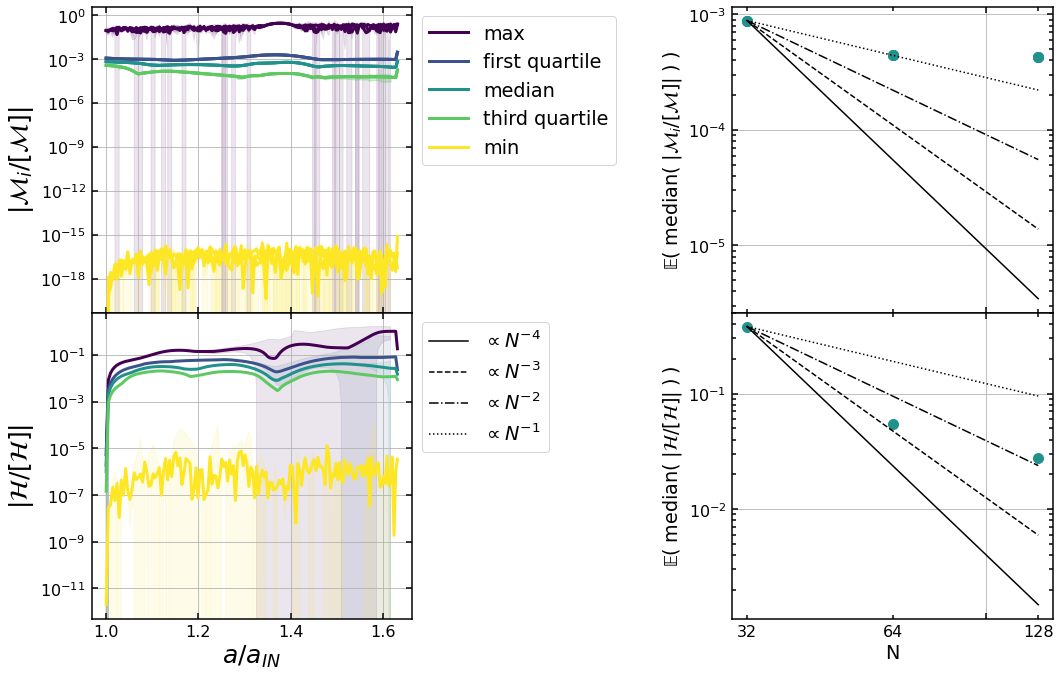

In [10]:
plt.figure(figsize=(15, 10))

ms = 10
labsize = 25
alphafac = 0.1
locs = ['maxabs', 'highQabs', 'medianabs', 'lowQabs', 'minabs']
loclabs = ['max', 'first quartile', 'median', 'third quartile', 'min']
cols = plt.cm.viridis(np.linspace(0,1,len(locs)))

convs = []


ax = plt.subplot(231)
for i, loc, in enumerate(locs):
    for n in range(3):
        var = 'Mom'+str(n+1)+'/MomEScale_'+loc
        var128 = np.array(f128[var])
        err = get_error(np.array(f32[var]), np.array(f64[var]), var128)
        #convs += [sim128['simname'], loc, get_conv(np.array(f32[var]), np.array(f64[var]), var128)]
        if n==0:
            ax.semilogy(an, var128, color=cols[i], linestyle='-', label=loclabs[i])
        else:
            ax.semilogy(an, var128, color=cols[i], linestyle='-')
        #ax.semilogy(an, var128, color=cols[i], linestyle=ls)
        ax.fill_between(an, var128-err, var128+err, color=cols[i], alpha=alphafac)
ax.grid()
ax.legend(bbox_to_anchor=(1,1))
ax.set_xticklabels([])
#ax.set_ylim(5e-10, 1)
ax.set_ylabel(r'$|\mathcal{M}_{i}/[\mathcal{M}]|$', fontsize=labsize)



ax = plt.subplot(234)
for i, loc, in enumerate(locs):
    var = 'Ham/HamEScale_'+loc
    var128 = np.array(f128[var])
    err = get_error(np.array(f32[var]), np.array(f64[var]), var128)
    ax.semilogy(an, var128, color=cols[i], linestyle='-')
    ax.fill_between(an, var128-err, var128+err, color=cols[i], alpha=alphafac)
ax.semilogy(an, [0.0]*len(an), 'k-', linewidth=1.5, label=r'$\propto N^{-4}$')
ax.semilogy(an, [0.0]*len(an), 'k--', linewidth=1.5, label=r'$\propto N^{-3}$')
ax.semilogy(an, [0.0]*len(an), 'k-.', linewidth=1.5, label=r'$\propto N^{-2}$')
ax.semilogy(an, [0.0]*len(an), 'k:', linewidth=1.5, label=r'$\propto N^{-1}$')
ax.grid()
#ax.set_ylim(1e-11, 2)
ax.set_xlabel(r'$a/a_{IN}$', fontsize=labsize)
ax.set_ylabel(r'$|\mathcal{H}/[\mathcal{H}]|$', fontsize=labsize)
ax.legend(bbox_to_anchor=(1,1))

cols = cols[2]
ax = plt.subplot(233)
N = np.array([32.0, 64.0, 128.0])
for n in range(3):
    var = [np.nanmean(np.array(f['Mom'+str(n+1)+'/MomEScale_medianabs'])) for f in [f32, f64, f128]]
    ax.loglog(N, var, marker='o', markersize=ms, color=cols, linewidth=0)
ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k-', linewidth=1.5)
ax.loglog(N, N**(-3)*var[0]/(N[0]**(-3)), 'k--', linewidth=1.5)
ax.loglog(N, N**(-2)*var[0]/(N[0]**(-2)), 'k-.', linewidth=1.5)
ax.loglog(N, N**(-1)*var[0]/(N[0]**(-1)), 'k:', linewidth=1.5)
ax.grid()
ylab = r'$\mathrm{\mathbb{E}}(\;$'+'median'+r'$(\;|\mathcal{M}_i/[\mathcal{M}]|\;)\;)$'
ax.set_ylabel(ylab)
ax.set_xlabel('N')
ax.set_xticklabels([])
ax.set_xticks([32, 64, 100, 128], ['', '', '', ''])
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
#plt.legend()


ax = plt.subplot(236)
var = [np.nanmean(np.array(f['Ham/HamEScale_medianabs'])) for f in [f32, f64, f128]]
ax.loglog(N, var, marker='o', markersize=ms, color=cols, linewidth=0)
ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k-', linewidth=1.5)
ax.loglog(N, N**(-3)*var[0]/(N[0]**(-3)), 'k--', linewidth=1.5)
ax.loglog(N, N**(-2)*var[0]/(N[0]**(-2)), 'k-.', linewidth=1.5)
ax.loglog(N, N**(-1)*var[0]/(N[0]**(-1)), 'k:', linewidth=1.5)
ax.grid()
ylab = r'$\mathrm{\mathbb{E}}(\;$'+'median'+r'$(\;|\mathcal{H}/[\mathcal{H}]|\;)\;)$'
ax.set_ylabel(ylab)
ax.set_xlabel('N')
ax.set_xticklabels([])
ax.set_xticks([32, 64, 100, 128], [32, 64, 100, 128])
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.99, top=0.95, wspace=0, hspace=0)

Text(0.5, 0, '$a/a_{IN}$')

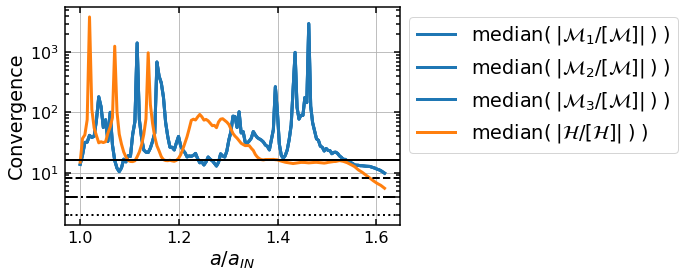

In [28]:
for n in range(3):
    var = 'Mom'+str(n+1)+'/MomEScale_medianabs'
    conv = get_conv(np.array(f32[var]), np.array(f64[var]), np.array(f128[var]))
    if n==0:
        lab = r'$(\;|\mathcal{M}_1/[\mathcal{M}]|\;)\;)$'
    elif n==1:
        lab = r'$(\;|\mathcal{M}_2/[\mathcal{M}]|\;)\;)$'
    elif n==2:
        lab = r'$(\;|\mathcal{M}_3/[\mathcal{M}]|\;)\;)$'
    plt.semilogy(an, conv, color='C0', label='median'+lab)
    
var = 'Ham/HamEScale_medianabs'
conv = get_conv(np.array(f32[var]), np.array(f64[var]), np.array(f128[var]))
plt.semilogy(an, conv, color='C1', label='median'+r'$(\;|\mathcal{H}/[\mathcal{H}]|\;)\;)$')
plt.axhline(y = 16, color='k', linestyle='-', linewidth = 2)
plt.axhline(y = 8, color='k', linestyle='--', linewidth = 2)
plt.axhline(y = 4, color='k', linestyle='-.', linewidth = 2)
plt.axhline(y = 2, color='k', linestyle=':', linewidth = 2)
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Convergence')
plt.xlabel(r'$a/a_{IN}$')

In [21]:
2**3

8